In [1]:
import seml
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/nfs/homedirs/ayle/miniconda3/envs/gr/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('lenet5-int', to_data_frame=True)

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

/nfs/homedirs/ayle/miniconda3/envs/gr/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
result_cols = [col for col in results.columns if col.startswith("result")]

In [4]:
results['result.lip_spec']

def get_int(tensor):
    return tensor.item()

results['result.lip_spec'] = results['result.lip_spec'].apply(get_int)

In [5]:
results = results.groupby(['config.arguments.train_scheme', 
                           'config.arguments.prune_criterion', 
                           'config.arguments.pruning_limit',
#                           'config.arguments.data_set', 
                           'config.arguments.seed',
                          ])[
    result_cols
].agg('mean')

In [6]:
results

result.train_acc  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit config.arguments.seed                     
DefaultTrainer                EarlyJohn                        0.50                           1234                           0.984375   
                                                                                              2345                           0.984375   
                                                                                              3456                           0.968750   
                                                                                              4567                           0.984375   
                                                                                              5678                           0.972656   
                                                               0.75                           1234                           0.966797   
                                                                                              2345                           0.964844   
                                                                                              3456                           0.933594   
                                                                                              4567                           0.972656   
                                                                                              5678                           0.958984   
                                                               0.90                           1234                           0.935547   
                                                                                              2345                           0.949219   
                                                                                              3456                           0.898438   
                                                                                              4567                           0.935547   
                                                                                              5678                           0.917969   
                                                               0.95                           1234                           0.927734   
                                                                                              2345                           0.923828   
                                                                                              3456                           0.888672   
                                                                                              4567                           0.935547   
                                                                                              5678                           0.917969   
                                                               0.98                           1234                           0.898438   
                                                                                              2345                           0.855469   
                                                                                              3456                           0.841797   
                                                                                              4567                           0.859375   
                                                                                              5678                           0.839844   
                              EarlySynflow                     0.50                           1234                           0.982422   
                                                                                              2345                           0.992188   
                                                               0.75                           1234                           0.978516   
       

In [125]:
results = results.reset_index()

In [126]:
subset = results[(results["config.arguments.train_scheme"] == "DefaultTrainer") &
           ((results["config.arguments.prune_criterion"] == "EarlyJohn") |
           (results["config.arguments.prune_criterion"] == "EmptyCrit") |
           (results["config.arguments.prune_criterion"] == "GRASP") |
            (results["config.arguments.prune_criterion"] == "IMP")
           )]

In [127]:
subset

,config.arguments.train_scheme,config.arguments.prune_criterion,config.arguments.pruning_limit,result.train_acc,result.test_acc,result.sparsity,result.cka,result.success_rate_FGSM_6,result.auroc_FGSM_6,result.aupr_FGSM_6,result.entropy_FGSM_6,result.auroc_entropy_FGSM_6,result.aupr_entropy_FGSM_6,result.success_rate_FGSM_12,result.auroc_FGSM_12,result.aupr_FGSM_12,result.entropy_FGSM_12,result.auroc_entropy_FGSM_12,result.aupr_entropy_FGSM_12,result.success_rate_FGSM_48,result.auroc_FGSM_48,result.aupr_FGSM_48,result.entropy_FGSM_48,result.auroc_entropy_FGSM_48,result.aupr_entropy_FGSM_48,result.success_rate_FGSM_96,result.auroc_FGSM_96,result.aupr_FGSM_96,result.entropy_FGSM_96,result.auroc_entropy_FGSM_96,result.aupr_entropy_FGSM_96,result.success_rate_L2FGSM_6,result.auroc_L2FGSM_6,result.aupr_L2FGSM_6,result.entropy_L2FGSM_6,result.auroc_entropy_L2FGSM_6,result.aupr_entropy_L2FGSM_6,result.success_rate_L2FGSM_12,result.auroc_L2FGSM_12,result.aupr_L2FGSM_12,result.entropy_L2FGSM_12,result.auroc_entropy_L2FGSM_12,result.aupr_entropy_L2FGSM_12,result.success_rate_L2FGSM_48,result.auroc_L2FGSM_48,result.aupr_L2FGSM_48,result.entropy_L2FGSM_48,result.auroc_entropy_L2FGSM_48,result.aupr_entropy_L2FGSM_48,result.success_rate_L2FGSM_96,result.auroc_L2FGSM_96,result.aupr_L2FGSM_96,result.entropy_L2FGSM_96,result.auroc_entropy_L2FGSM_96,result.aupr_entropy_L2FGSM_96,result.conf_auroc,result.conf_aupr,result.brier_score,result.entropy,result.auroc_MNIST,result.aupr_MNIST,result.entropy_MNIST,result.auroc_entropy_MNIST,result.aupr_entropy_MNIST,result.auroc_KMNIST,result.aupr_KMNIST,result.entropy_KMNIST,result.auroc_entropy_KMNIST,result.aupr_entropy_KMNIST,result.auroc_OMNIGLOT,result.aupr_OMNIGLOT,result.entropy_OMNIGLOT,result.auroc_entropy_OMNIGLOT,result.aupr_entropy_OMNIGLOT,result.auroc_INV_OMNIGLOT,result.aupr_INV_OMNIGLOT,result.entropy_INV_OMNIGLOT,result.auroc_entropy_INV_OMNIGLOT,result.aupr_entropy_INV_OMNIGLOT,result.auroc_GAUSSIAN,result.aupr_GAUSSIAN,result.entropy_GAUSSIAN,result.auroc_entropy_GAUSSIAN,result.aupr_entropy_GAUSSIAN,result.lip_spec
0,DefaultTrainer,EarlyJohn,0.50,0.978906,0.897493,0.499213,0.757493,0.328117,0.640321,0.624845,0.142662,0.505774,0.504623,0.479636,0.667195,0.669154,0.149730,0.506590,0.505452,0.730188,0.665892,0.658193,0.158878,0.505504,0.505526,0.806744,0.693906,0.677399,0.200894,0.504917,0.503477,0.113860,0.512418,0.508553,0.088068,0.501338,0.501919,0.124737,0.523969,0.516748,0.092442,0.501552,0.501990,0.194230,0.578918,0.560132,0.114866,0.503113,0.502834,0.282602,0.623059,0.603127,0.135642,0.505143,0.504805,0.900189,0.987173,0.149597,0.083463,0.797284,0.805036,0.331785,0.801959,0.776009,0.822936,0.837992,0.370216,0.828432,0.802043,0.407047,0.420542,0.060833,0.366051,0.506882,0.885376,0.906485,0.364904,0.882738,0.836950,0.750040,0.758943,0.238721,0.753014,0.711042,9.168125e+04
1,DefaultTrainer,EarlyJohn,0.75,0.959375,0.897865,0.748820,0.743698,0.311460,0.631539,0.615067,0.197328,0.503417,0.502653,0.461001,0.669036,0.671604,0.219978,0.504738,0.503927,0.741426,0.686455,0.700519,0.239679,0.504417,0.504479,0.836884,0.703072,0.708450,0.277627,0.504150,0.502166,0.113138,0.510839,0.507250,0.123343,0.500275,0.500140,0.124028,0.521076,0.514437,0.129418,0.500453,0.500128,0.189403,0.570261,0.552246,0.158582,0.501276,0.499876,0.268184,0.613077,0.592980,0.185633,0.502703,0.501470,0.898626,0.987363,0.155353,0.116839,0.779679,0.791477,0.402106,0.787618,0.766590,0.808587,0.829413,0.443680,0.817281,0.793375,0.361330,0.360200,0.052206,0.337705,0.472428,0.768453,0.812689,0.246976,0.767668,0.715335,0.697135,0.715455,0.268350,0.701279,0.666857,1.164548e+06
2,DefaultTrainer,EarlyJohn,0.90,0.927344,0.897557,0.898585,0.717653,0.283710,0.613368,0.595246,0.284627,0.503191,0.501329,0.413629,0.659817,0.652960,0.330657,0.503667,0.502048,0.744183,0.709734,0.723679,0.445812,0.505688,0.505538,0.861010,0.736476,0.747881,0.520886,0.507302,0.506928,0.112385,0.508519,0.505731,0.190626,0.501538,0.500108,0.121766,0.516545,0.5

In [133]:
criterions = np.delete(np.unique(results["config.arguments.prune_criterion"]), np.where(np.unique(results["config.arguments.prune_criterion"]) == "EmptyCrit"))

In [134]:
criterions = np.delete(criterions, np.where(np.unique(results["config.arguments.prune_criterion"]) == "EarlySynflow"))

In [135]:
criterions = ['GRASP', 'SNIPit', 'EarlyJohn', 'IMP']
names = ['GRASP (Before)', 'SNIPit (Before)', 'Early-CROP (Early)', 'IMP (Rewinding)']

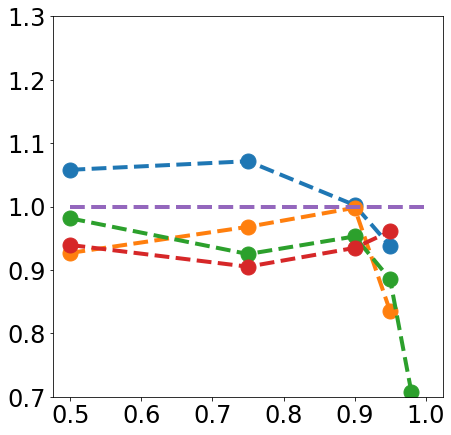

In [152]:
for col in results.columns:
    if col.startswith("result"):
        if col.split('.')[-1].startswith('aupr_GAUSSIAN'):
            dense = results[results["config.arguments.prune_criterion"] == 'EmptyCrit']
    #         plt.figure(figsize=(15, 15))
            plt.figure(figsize=(7, 7))
            for i, crit in enumerate(criterions):
                subset = results[results["config.arguments.prune_criterion"] == crit]
                plt.plot(subset["config.arguments.pruning_limit"], subset[col] / dense[col].iloc[0], linestyle='--', marker='o', label=names[i], linewidth=4, markersize=15)
            plt.plot(np.linspace(0.5, 1, 200), [1] * 200, label='Dense', linestyle='--', linewidth=4)
    #         plt.xlabel("Sparsity", fontsize=24)
#             plt.ylabel(col.split('.')[-1])
    #         plt.ylabel('Adversarial Success (FGSM \u03B5=6)', fontsize=24)
            plt.ylim(0.7, 1.3)
    #         plt.legend(fontsize=32, loc='upper center', ncol=5, bbox_to_anchor=(1, -2))
#             plt.legend()
            plt.xticks(fontsize=24)
            plt.yticks(fontsize=24)
            plt.show()